#**Black friday Dataset EDA and Feature engineering**

**Cleaning and Preparing the data for Model training**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Problem Statement**

**A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.**

**Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.**

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.shape

(550068, 12)

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.shape

(233599, 11)

In [ ]:
#Concat test and train data
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


###**Handling Categorical features**

**Handling categorical feature Gender**

In [ ]:
#pd.get_dummies(df['Gender'])

In [ ]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.sample(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
28912,P00294142,1,26-35,16,B,2,1,5,8.0,15.0,7037.0
750688,P00037242,1,18-25,4,A,0,0,8,NaN,NaN,NaN


**Handling categorical feature Age**

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#pd.get_dummies(df['Age'],drop_first =True).astype(int)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Age'] = label_encoder.fit_transform(df['Age'])
# df['Age'].unique()

In [ ]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


**Handling categorical feature City**

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True).astype(int)

In [ ]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df = pd.concat([df,df_city],axis=1)

In [ ]:
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0


In [ ]:
#drop City_Category feature
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


**Handling categorical feature 'Stay_In_Current_City_Years'**

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


###**Handling Missing Values**

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

**filling missing values in Product_Category_2**

In [ ]:
# focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64

In [ ]:
df['Product_Category_2'].mode()[0]

8.0

In [ ]:
#Replace the missing values with Mode
df['Product_Category_2'] = df['Product_Category_2'].fillna((df['Product_Category_2'].mode()[0]))

In [ ]:
df['Product_Category_2'].isnull().sum()

0

**filling missing values in Product_Category_3**

In [ ]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [ ]:
df['Product_Category_3'].mode()[0]

16.0

In [ ]:
df['Product_Category_3'] = df['Product_Category_3'].fillna((df['Product_Category_3'].mode()[0]))

In [ ]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

### **Visualization**

<Axes: title={'center': 'Age vs Purchase'}, xlabel='Age', ylabel='Purchase'>

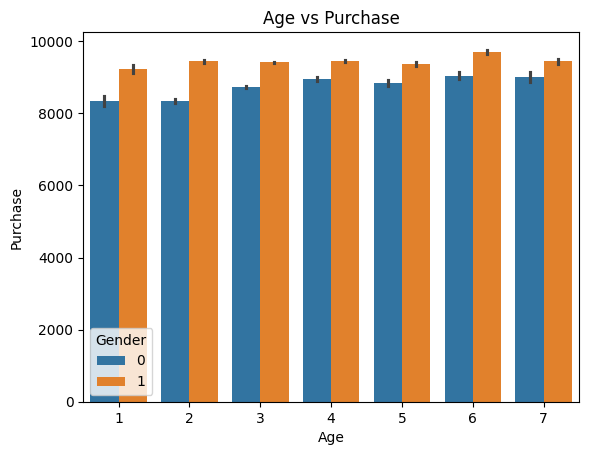

In [ ]:
plt.title("Age vs Purchase")
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

**Observation:**

**Purchasing of Men is Higher than Women**

<Axes: title={'center': 'Occupation vs Purchase'}, xlabel='Occupation', ylabel='Purchase'>

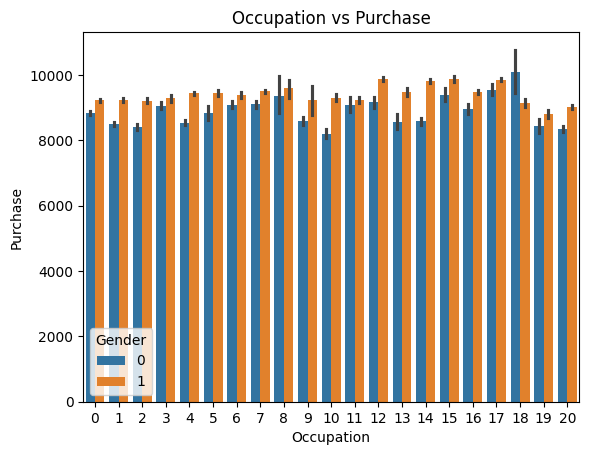

In [ ]:
plt.title("Occupation vs Purchase")
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

**Observation:**

**Occupation No:18 had Highest Purchase**

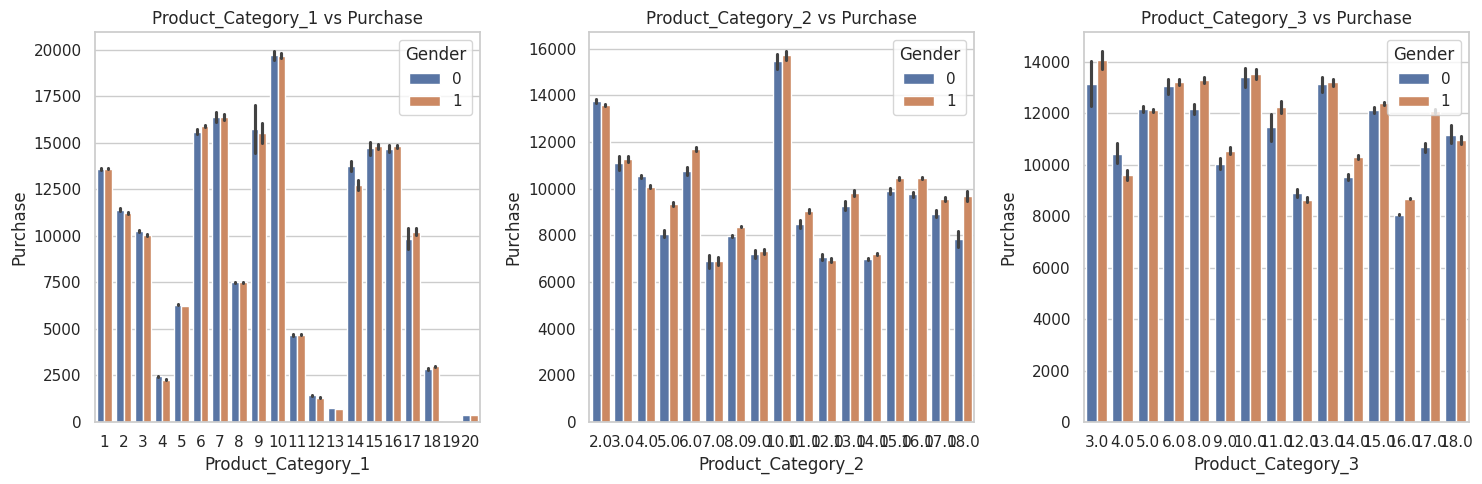

In [ ]:
# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Plot 1:
plt.subplot(1, 3, 1)
plt.title("Product_Category_1 vs Purchase")
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

# Plot 2:
plt.subplot(1, 3, 2)
plt.title("Product_Category_2 vs Purchase")
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

# Plot 3:
plt.subplot(1, 3, 3)
plt.title("Product_Category_3 vs Purchase")
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

plt.tight_layout()
plt.show()

**Observation:**

**Product_Category_1 is the Most Purchased**

In [ ]:
df.drop('Product_ID',axis=1,inplace=True)

In [ ]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


### **Preparing Data for Model Creation**

In [ ]:
df_test = df[df['Purchase'].isnull()]

In [ ]:
print(df_test.shape)
print("---------")
df_test.isnull().sum()

(233599, 11)
---------


Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
df_train = df[~df['Purchase'].isnull()]

In [ ]:
df_train.shape

(550068, 11)

In [ ]:
x = df_train.drop('Purchase',axis=1)

In [ ]:
y = df_train['Purchase']

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)